In [22]:
## Task 1
import h5py
f = h5py.File('./data/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z', 'r')
treeArray = f['t_allpar_new'][()]

In [23]:
import pandas as pd
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_undef']
labels_df = pd.DataFrame(treeArray, columns = labels)
labels_df


,j_q,j_g,j_w,j_z,j_t,j_undef
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
5119904,0,1,0,0,0,0
5119905,0,0,1,0,0,0
5119906,0,0,0,1,0,0
5119907,0,1,0,0,0,0


In [24]:
labels_df = pd.DataFrame(columns=['Label','Number of jets','Description'], data=[['Total',labels_df.shape[0],'Total statistics'],['q',labels_df.j_q.sum(),'Light-quark jet'],['g',labels_df.j_g.sum(),'Gluon jet'],['w',labels_df.j_w.sum(),'W-boson jet'],['z',labels_df.j_z.sum(),'Z-boson jet'],['t',labels_df.j_t.sum(),'Top-quark jet'],['undef',0,'Undefined jet']])

In [25]:
labels_df

,Label,Number of jets,Description
0,Total,5119909,Total statistics
1,q,777373,Light-quark jet
2,g,1390520,Gluon jet
3,w,798451,W-boson jet
4,z,834146,Z-boson jet
5,t,1319419,Top-quark jet
6,undef,0,Undefined jet


In [26]:
## Task 2

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
features = ['j_mass_mmdt', 'j_pt', 'j_eta', 'j_zlogz', 'j_multiplicity', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 
      'j_d2_b1_mmdt','j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 
      'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 
      'j_n2_b1_mmdt', 'j_n2_b2_mmdt']
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_undef']

In [29]:
def plot_1D(feature):
    
    features = [feature] + labels
    features_df = pd.DataFrame(treeArray,columns = features)
    val = features_df[features].values

    q = []
    g = []
    w = []
    z = []
    t = []

    for x in val:
        if x[1] == 1:
            g.append(x[0])
        if x[2] == 1:
            q.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            t.append(x[0])
    plt.hist(g,100,histtype='step',density = True, label = 'gluon',color = 'blue')
    plt.hist(q,100,histtype='step',density = True, label = 'quark',color = 'red')
    plt.hist(w,100,histtype='step',density = True, label = 'W',color = 'black')
    plt.hist(z,100,histtype='step',density = True, label = 'Z',color = 'green')
    plt.hist(t,100,histtype='step',density = True, label = 'top',color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob Density')
    plt.legend()
    plt.show()

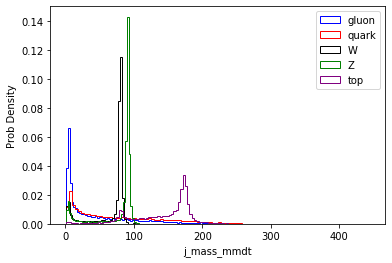

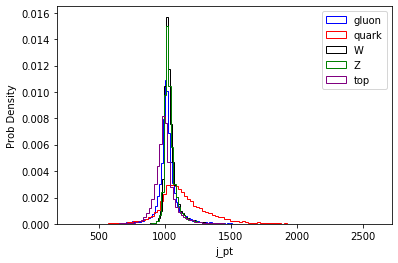

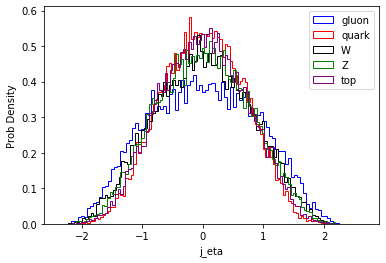

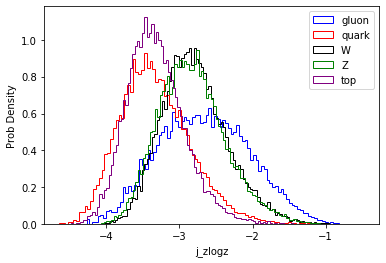

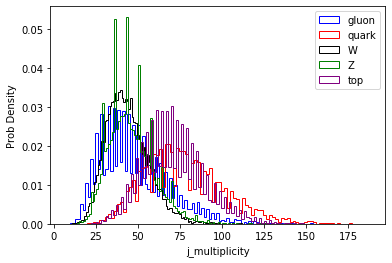

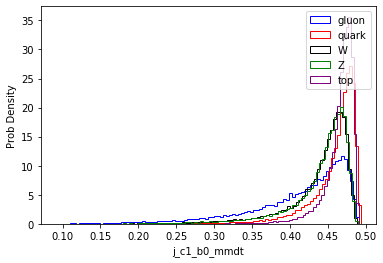

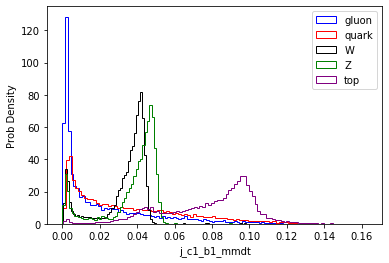

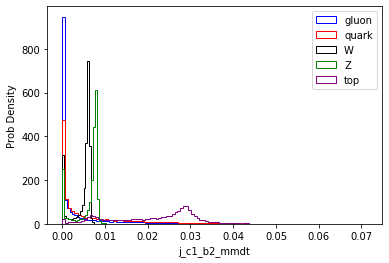

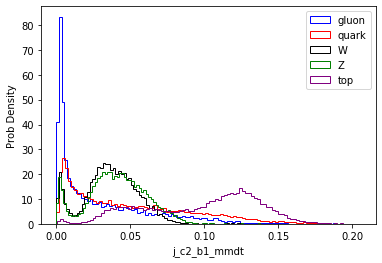

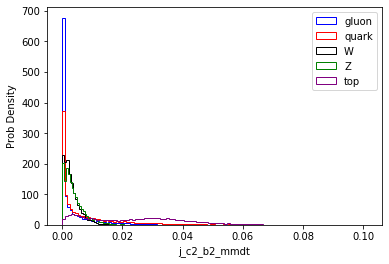

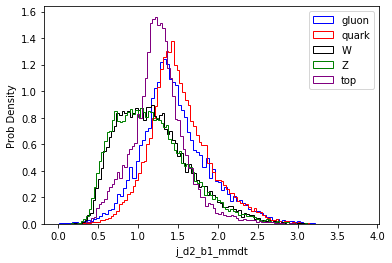

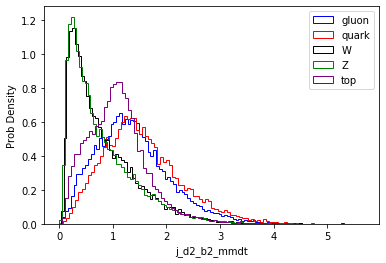

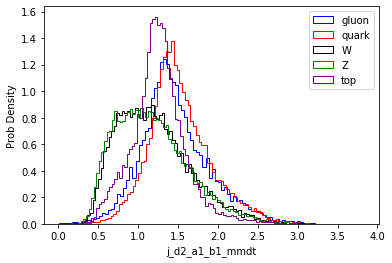

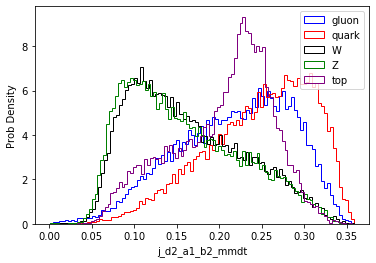

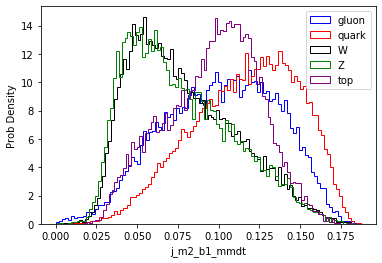

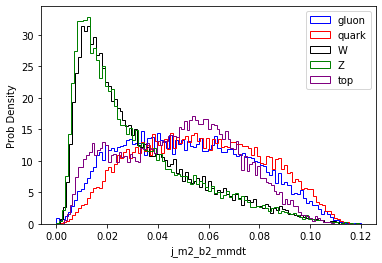

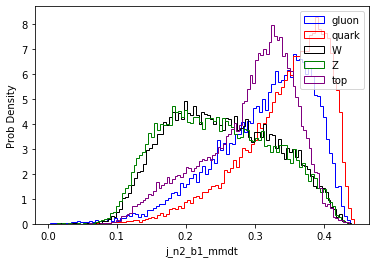

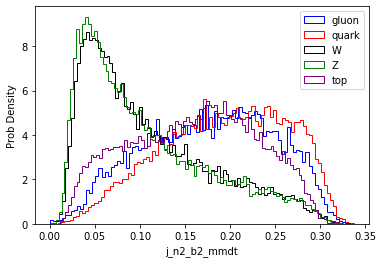

In [31]:
for y in features:
    plot_1D(y)


In [34]:
##Task3

In [40]:
low_feature = ['j1_px', 'j1_py', 'j1_pz', 'j1_e', 'j1_pdgid', 
            'j1_erel', 'j1_pt', 'j1_ptrel', 'j1_eta', 'j1_etarel', 
             'j1_etarot', 'j1_phi', 'j1_phirel', 'j1_phirot', 
            'j1_deltaR', 'j1_costheta', 'j1_costhetarel', 
             'j1_e1mcosthetarel']
low_feat_df = pd.DataFrame(treeArray, columns = low_feature + labels)

In [41]:
def plot_1D_low(feature):
    
    features = [feature] + labels
    features_df = pd.DataFrame(treeArray,columns = features)
    val = features_df[features].values

    q = []
    g = []
    w = []
    z = []
    t = []

    for x in val:
        if x[1] == 1:
            g.append(x[0])
        if x[2] == 1:
            q.append(x[0])
        if x[3] == 1:
            w.append(x[0])
        if x[4] == 1:
            z.append(x[0])
        if x[5] == 1:
            t.append(x[0])
    plt.hist(g,100,histtype='step',density = True,log=True, label = 'gluon',color = 'blue')
    plt.hist(q,100,histtype='step',density = True,log=True, label = 'quark',color = 'red')
    plt.hist(w,100,histtype='step',density = True,log=True, label = 'W',color = 'black')
    plt.hist(z,100,histtype='step',density = True,log=True, label = 'Z',color = 'green')
    plt.hist(t,100,histtype='step',density = True,log=True, label = 'top',color = 'purple')
    plt.xlabel(feature)
    plt.ylabel('Prob Density')
    plt.legend()
    plt.show()

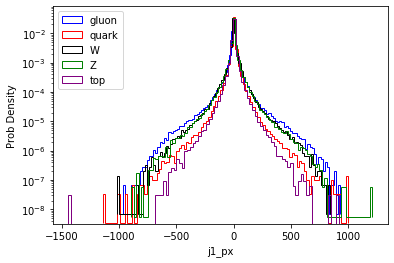

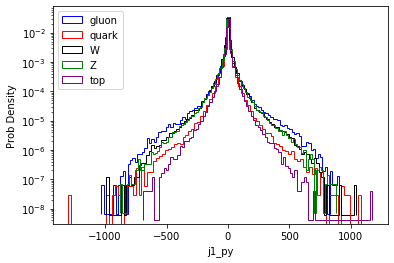

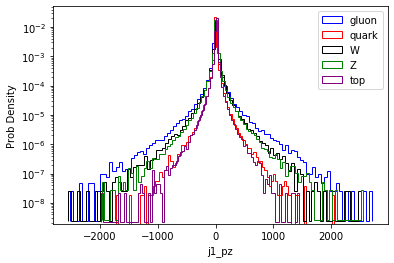

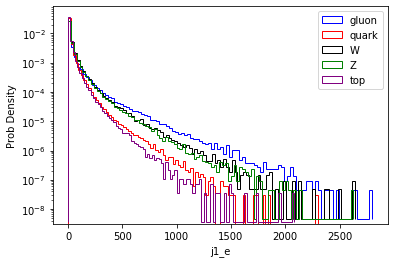

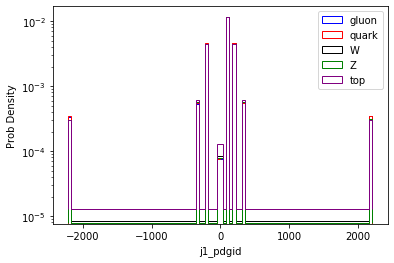

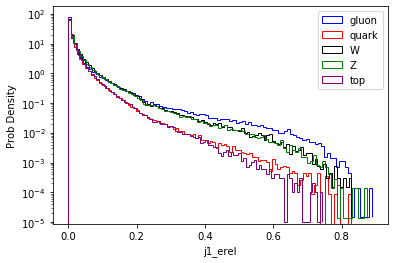

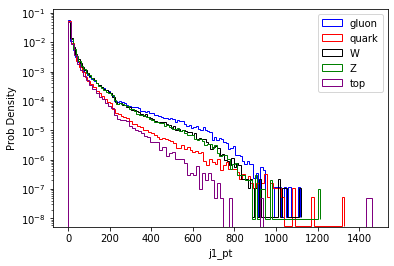

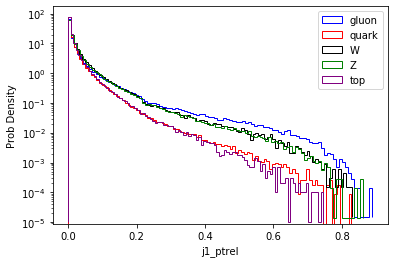

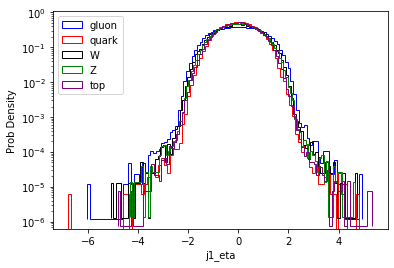

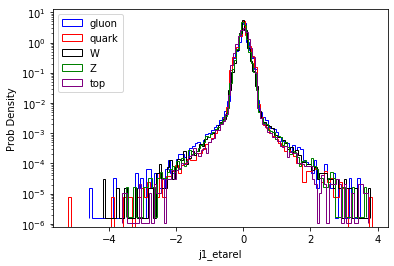

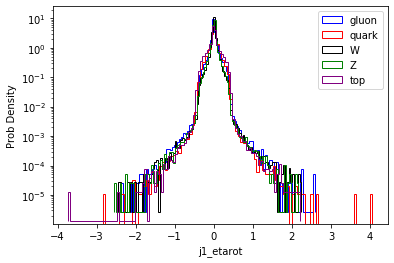

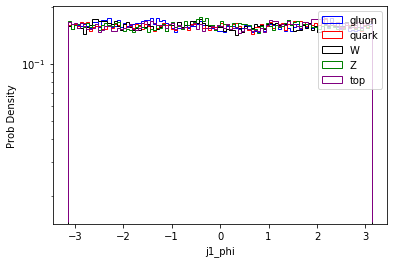

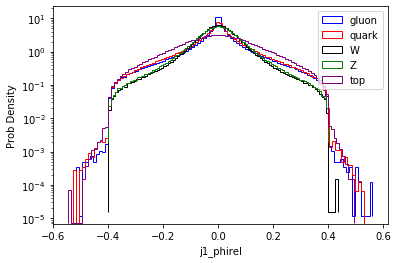

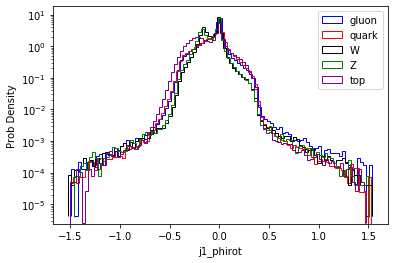

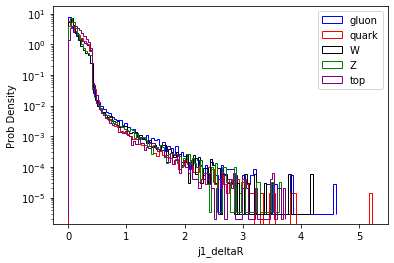

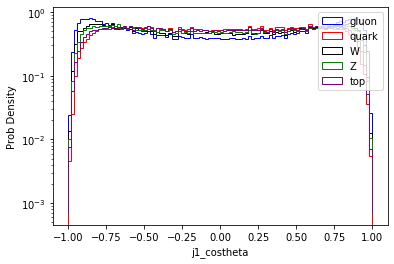

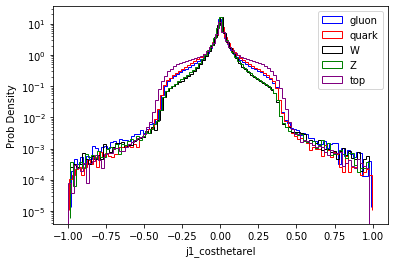

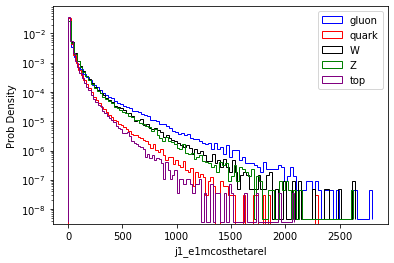

In [42]:
for i in low_feature:
    plot_1D_low(i)

In [43]:
##2d


In [48]:

labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t']


In [53]:
def twoD_plot(feature):
    plt.clf()
    plt.hist2d(x = low_feat_df[low_feat_df[feature] == 1].j1_etarot,
        y = low_feat_df[low_feat_df[feature] == 1].j1_phirot,
        weights = low_feat_df[low_feat_df[feature] == 1].j1_ptrel)
    
    plt.title( feature + ' jet weighted by j1_ptrel')
    plt.xlabel('j1_etarot')
    plt.ylabel('j1_phirot')
    plt.show()

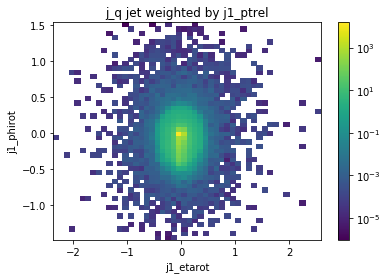

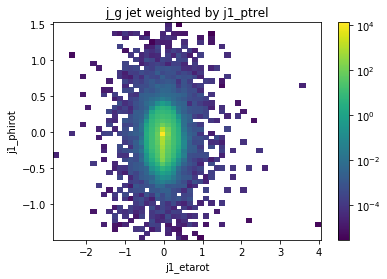

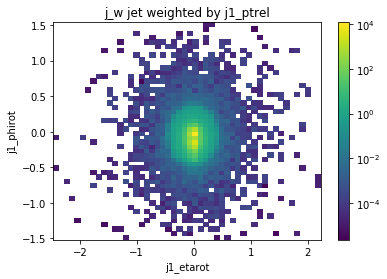

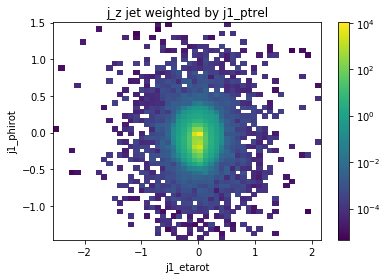

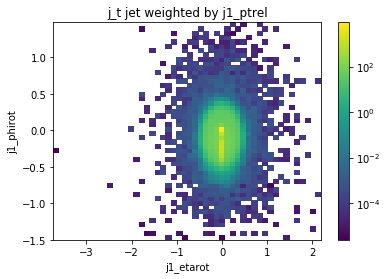

In [54]:

for i in labels:
    twoD_plot(i)

In [63]:
def twoD_plot_phi(feature):
    plt.clf()
    plt.hist2d(x = low_feat_df[low_feat_df[feature] == 1].j1_eta,
        y = low_feat_df[low_feat_df[feature] == 1].j1_phi,
        weights = low_feat_df[low_feat_df[feature] == 1].j1_ptrel,
        bins = 100,norm = LogNorm())
    
    plt.colorbar()
    plt.title( feature + ' jet weighted by j1_ptrel')
    plt.xlabel('j1_etarot')
    plt.ylabel('j1_phirot')
    plt.show()

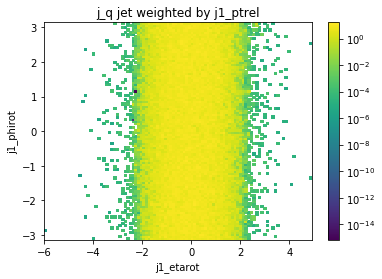

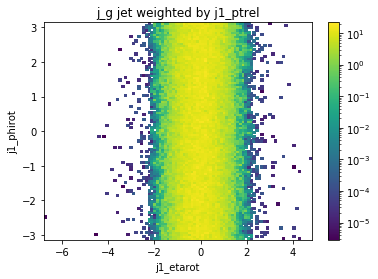

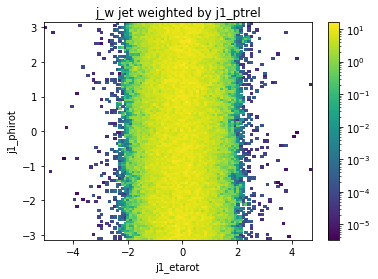

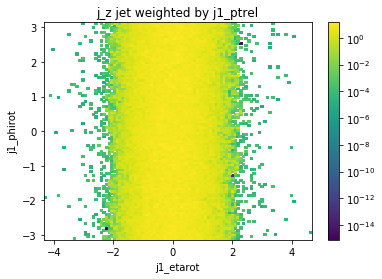

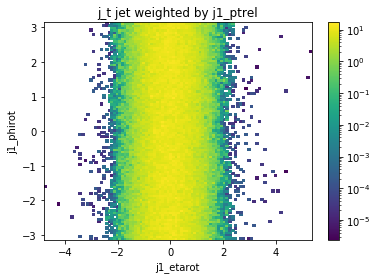

In [64]:

for i in labels:
    twoD_plot_phi(i)